In [1]:
import torch
from torch.utils.data import Dataset, DataLoader

In [2]:
class Dataset(Dataset):
    def __init__(self):
        self.data = torch.tensor([[1,1,1,1],[2,2,2,2],[3,3,3,3],[4,4,4,4]])
        self.label = torch.tensor([1, 2, 3, 4])

    def __getitem__(self,index):
        return self.data[index],self.label[index]

    def __len__(self):
        return len(self.data)

In [3]:
dataset = Dataset()
dataloader = DataLoader(dataset=dataset,
                          batch_size=1, shuffle=True)

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
for i,(data,label) in enumerate(dataloader):
    data = data.to(device)
    label = label.to(device)
    print(data,label)

cpu
tensor([[1, 1, 1, 1]]) tensor([1])
tensor([[3, 3, 3, 3]]) tensor([3])
tensor([[4, 4, 4, 4]]) tensor([4])
tensor([[2, 2, 2, 2]]) tensor([2])


In [5]:
dataloader = DataLoader(dataset=dataset,
                          batch_size=2, shuffle=True)

In [6]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
for i,(data,label) in enumerate(dataloader):
    data = data.to(device)
    label = label.to(device)
    print(data,label)

cpu
tensor([[3, 3, 3, 3],
        [2, 2, 2, 2]]) tensor([3, 2])
tensor([[4, 4, 4, 4],
        [1, 1, 1, 1]]) tensor([4, 1])


In [7]:
class CustomImageDataset(Dataset):
	def __init__(self, annotations_file, img_dir, transform = None, target_transform = None):
		self.img_labels = pd.read_csv(annotations_file)
		self.img_dir = img_dir
		self.transform = transform
		self.target_transform = target_transform
	def __len__(self):
		return len(self.img_labels)

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):
	def __init__(self):
		super(Net, self).__init__()
		self.conv1 = nn.Conv2d(1, 6, 5)
		self.conv2 = nn.Conv2d(6, 16, 5)
		self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
		self.fc2 = nn.Linear(120, 84)
		self.fc3 = nn.Linear(84, 10)
def forward(self, x):
	x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
	x = F.max_pool2d(F.relu(self.conv2(x)), 2)
	x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
	x = F.relu(self.fc1(x))
	x = F.relu(self.fc2(x))
	x = self.fc3(x)
	return x
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [12]:
!pip install torchvision


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip install --upgrade pip


['(3).jpg', '(2).jpg', '(1).jpg']


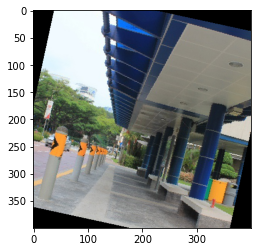

In [15]:
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import functional as F
import torchvision.transforms as transforms
from PIL import Image as Image
import matplotlib.pyplot as plt
import os

class Dataset(Dataset):
    def __init__(self, dir, transform=None):
        self.dir = dir
        self.image_list = os.listdir(dir) 
        print(self.image_list)
        self.transform = transform
    def __len__(self):
        return len(self.image_list)

    def __getitem__(self,index):
        image = Image.open(os.path.join(self.dir,self.image_list[index]))
        if self.transform:        
            image = self.transform(image)
        else:
            image = F.to_tensor(image)

        return image

my_transform = transforms.Compose([
    transforms.RandomCrop(400),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ToTensor()
])

dataset = Dataset(dir="./img",transform=my_transform)
dataloader = DataLoader(dataset=dataset,
                          batch_size=1, shuffle=True)

for epoch in range(1):
    for i,(image) in enumerate(dataloader):
        plt.imshow(image[0].permute(1, 2, 0))